In [1]:
import yaml
import strava

In [23]:
from importlib import reload

In [25]:
strava=reload(strava)

In [2]:
auth = yaml.load(open('auth.yaml'))

In [3]:
new_auth = strava.refresh_token(auth)

In [5]:
with open('auth.yaml', 'w') as of:
    of.write(yaml.dump(new_auth))

In [6]:
auth = new_auth

In [29]:
segments = []
for activity in strava.iter_activities(auth):
    segments.extend(strava.get_activity(activity['id'], auth)['segment_efforts'])

In [30]:
for segment in segments:
    segment.update(segment['segment'])
    del segment['segment']

In [31]:
import pandas

In [32]:
df = pandas.DataFrame(segments)

In [33]:
%matplotlib inline

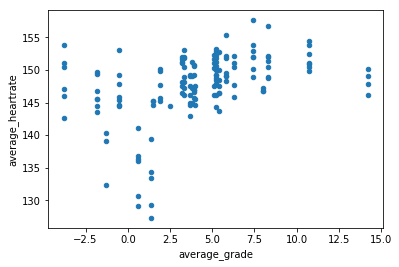

In [34]:
df.plot.scatter('average_grade', 'average_heartrate')


In [49]:
import statsmodels.formula.api as smf

In [52]:
results = smf.ols('average_heartrate ~ average_grade', data=df).fit()

In [54]:
summary = results.summary2()

In [56]:
type(summary)

statsmodels.iolib.summary2.Summary

In [58]:
print(str(summary))

                 Results: Ordinary least squares
Model:              OLS               Adj. R-squared:     0.168   
Dependent Variable: average_heartrate AIC:                885.1733
Date:               2019-04-03 19:36  BIC:                891.1677
No. Observations:   148               Log-Likelihood:     -440.59 
Df Model:           1                 F-statistic:        30.73   
Df Residuals:       146               Prob (F-statistic): 1.35e-07
R-squared:          0.174             Scale:              22.865  
------------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------
Intercept      145.2304   0.5817 249.6765 0.0000 144.0808 146.3799
average_grade    0.5836   0.1053   5.5438 0.0000   0.3756   0.7917
------------------------------------------------------------------
Omnibus:              48.798       Durbin-Watson:          1.295  
Prob(Omnibus)